---

Applied Statistics

# Worksheet: Railway Field Laboratory 1 – Visualization

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 1. Import and visualise data
#### a) Use the `pd.read_pickle` function to import the data from `railway.pkl`.

In [2]:
data_raw = pd.read_pickle("railway.pkl")

#### b) Try to understand the data and its structure.  
Visualize the data to do this. 
Try it on your own first. If you need guidance, you can solve tasks 2 and 3.

### 2. Check the data structure
#### a) Are there an equal number of observations for each combination of location_name and sensor_position?

In [3]:
data_raw[['location_name', 'sensor_position']].value_counts()

location_name  sensor_position
MQ11           3.0m               19971
               7.5m               19971
MQ12           3.0m               19971
               7.5m               19971
MQ13           3.0m               19971
               7.5m               19971
MQ21           3.0m               19971
               7.5m               19971
MQ22           3.0m               19971
               7.5m               19971
MQ23           3.0m               19971
               7.5m               19971
REF            3.0m               19971
               7.5m               19971
Name: count, dtype: int64

#### b) What is the difference between `train_id` and `passby_id`?

train_id:

In [4]:
data_raw.index.value_counts().value_counts()

count
2    139797
Name: count, dtype: int64

In [5]:
data_raw.sensor_position.reset_index().value_counts().value_counts()

count
1    279594
Name: count, dtype: int64

passby_id

In [6]:
data_raw.passby_id.value_counts().value_counts()

count
14    19971
Name: count, dtype: int64

In [7]:
data_raw[['passby_id', 'location_name', 'sensor_position']].value_counts().value_counts()

count
1    279594
Name: count, dtype: int64

#### c) What is the relationship between the variables `location_name` (cross section) and `zw` (Zwischenlage, rail pad)?

In [8]:
data_raw[['location_name', 'zw']].value_counts()

location_name  zw     
MQ12           alte_zw    39942
MQ13           alte_zw    39942
MQ22           alte_zw    39942
MQ23           alte_zw    39942
REF            alte_zw    39942
MQ11           neue_zw    31862
MQ21           neue_zw    31862
MQ11           alte_zw     8080
MQ21           alte_zw     8080
Name: count, dtype: int64

#### d) How many passbys and measurements are there per  `zugtyp` (train type)? Are the numbers plausible?

In [9]:
data_raw[['zugtyp']].value_counts()

zugtyp     
Flirt          123270
IC2000          65408
Traverso        26656
EWIV_IC2000     21210
RABe501         19600
FV-Dosto        10486
RBDe560          6958
EWIV             3752
ETR610           1386
RV-Dosto          868
Name: count, dtype: int64

In [10]:
data_raw[['zugtyp']].value_counts() / 14

zugtyp     
Flirt          8805.0
IC2000         4672.0
Traverso       1904.0
EWIV_IC2000    1515.0
RABe501        1400.0
FV-Dosto        749.0
RBDe560         497.0
EWIV            268.0
ETR610           99.0
RV-Dosto         62.0
Name: count, dtype: float64

### 3. Visualization
#### a) We focus on the cross section MQ 2.1. Filter out the other data.

In [11]:
dataMQ21 = data_raw.query('location_name == "MQ21"').copy()

#### b) `tel80` is the target variable. Create box plots to investigate the bivariate distributions of the target variable with:
* sensor position
* train type
* rail pad

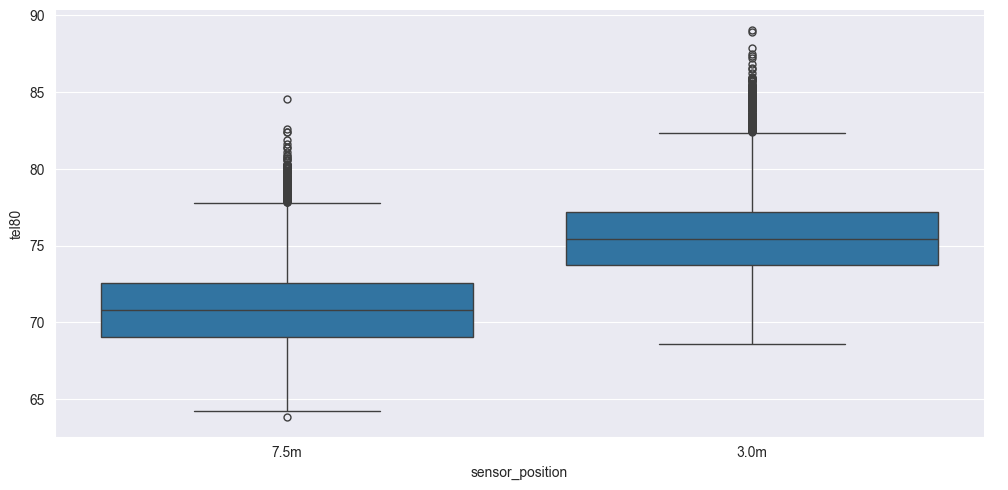

In [12]:
sns.catplot(
    data=dataMQ21,
    x='sensor_position',
    y='tel80',
    kind='box',
    height=5, aspect=2
)

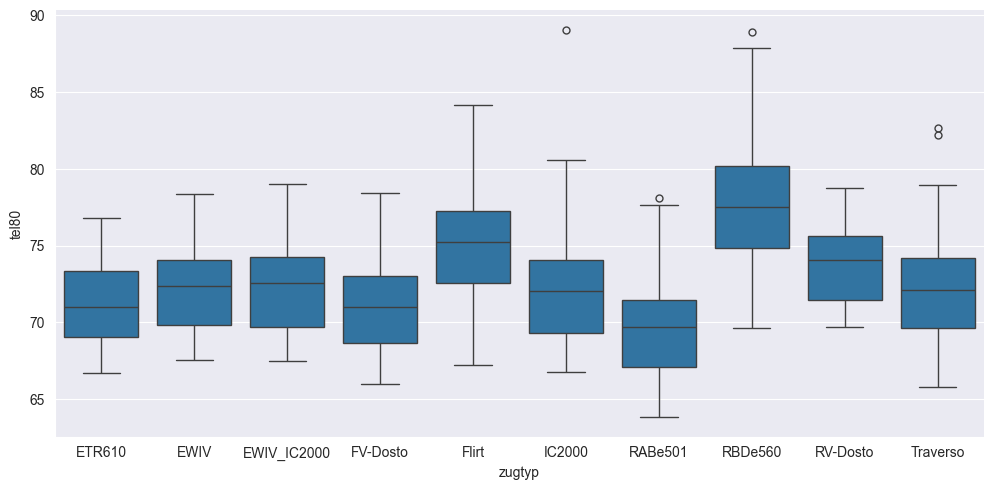

In [13]:
sns.catplot(
    data=dataMQ21,
    x='zugtyp',
    y='tel80',
    kind='box',
    height=5, aspect=2
)

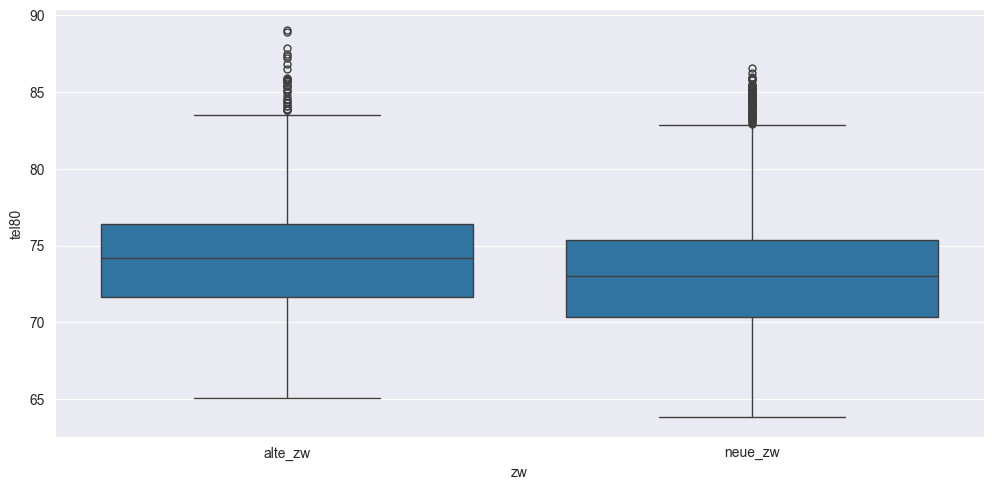

In [14]:
sns.catplot(
    data=dataMQ21,
    x='zw',
    y='tel80',
    kind='box',
    height=5, aspect=2
)

#### c) Create a scatter plot of `starttime` and `tel80` for each combination of `zugtyp` and `sensor_position`.
What do you notice?

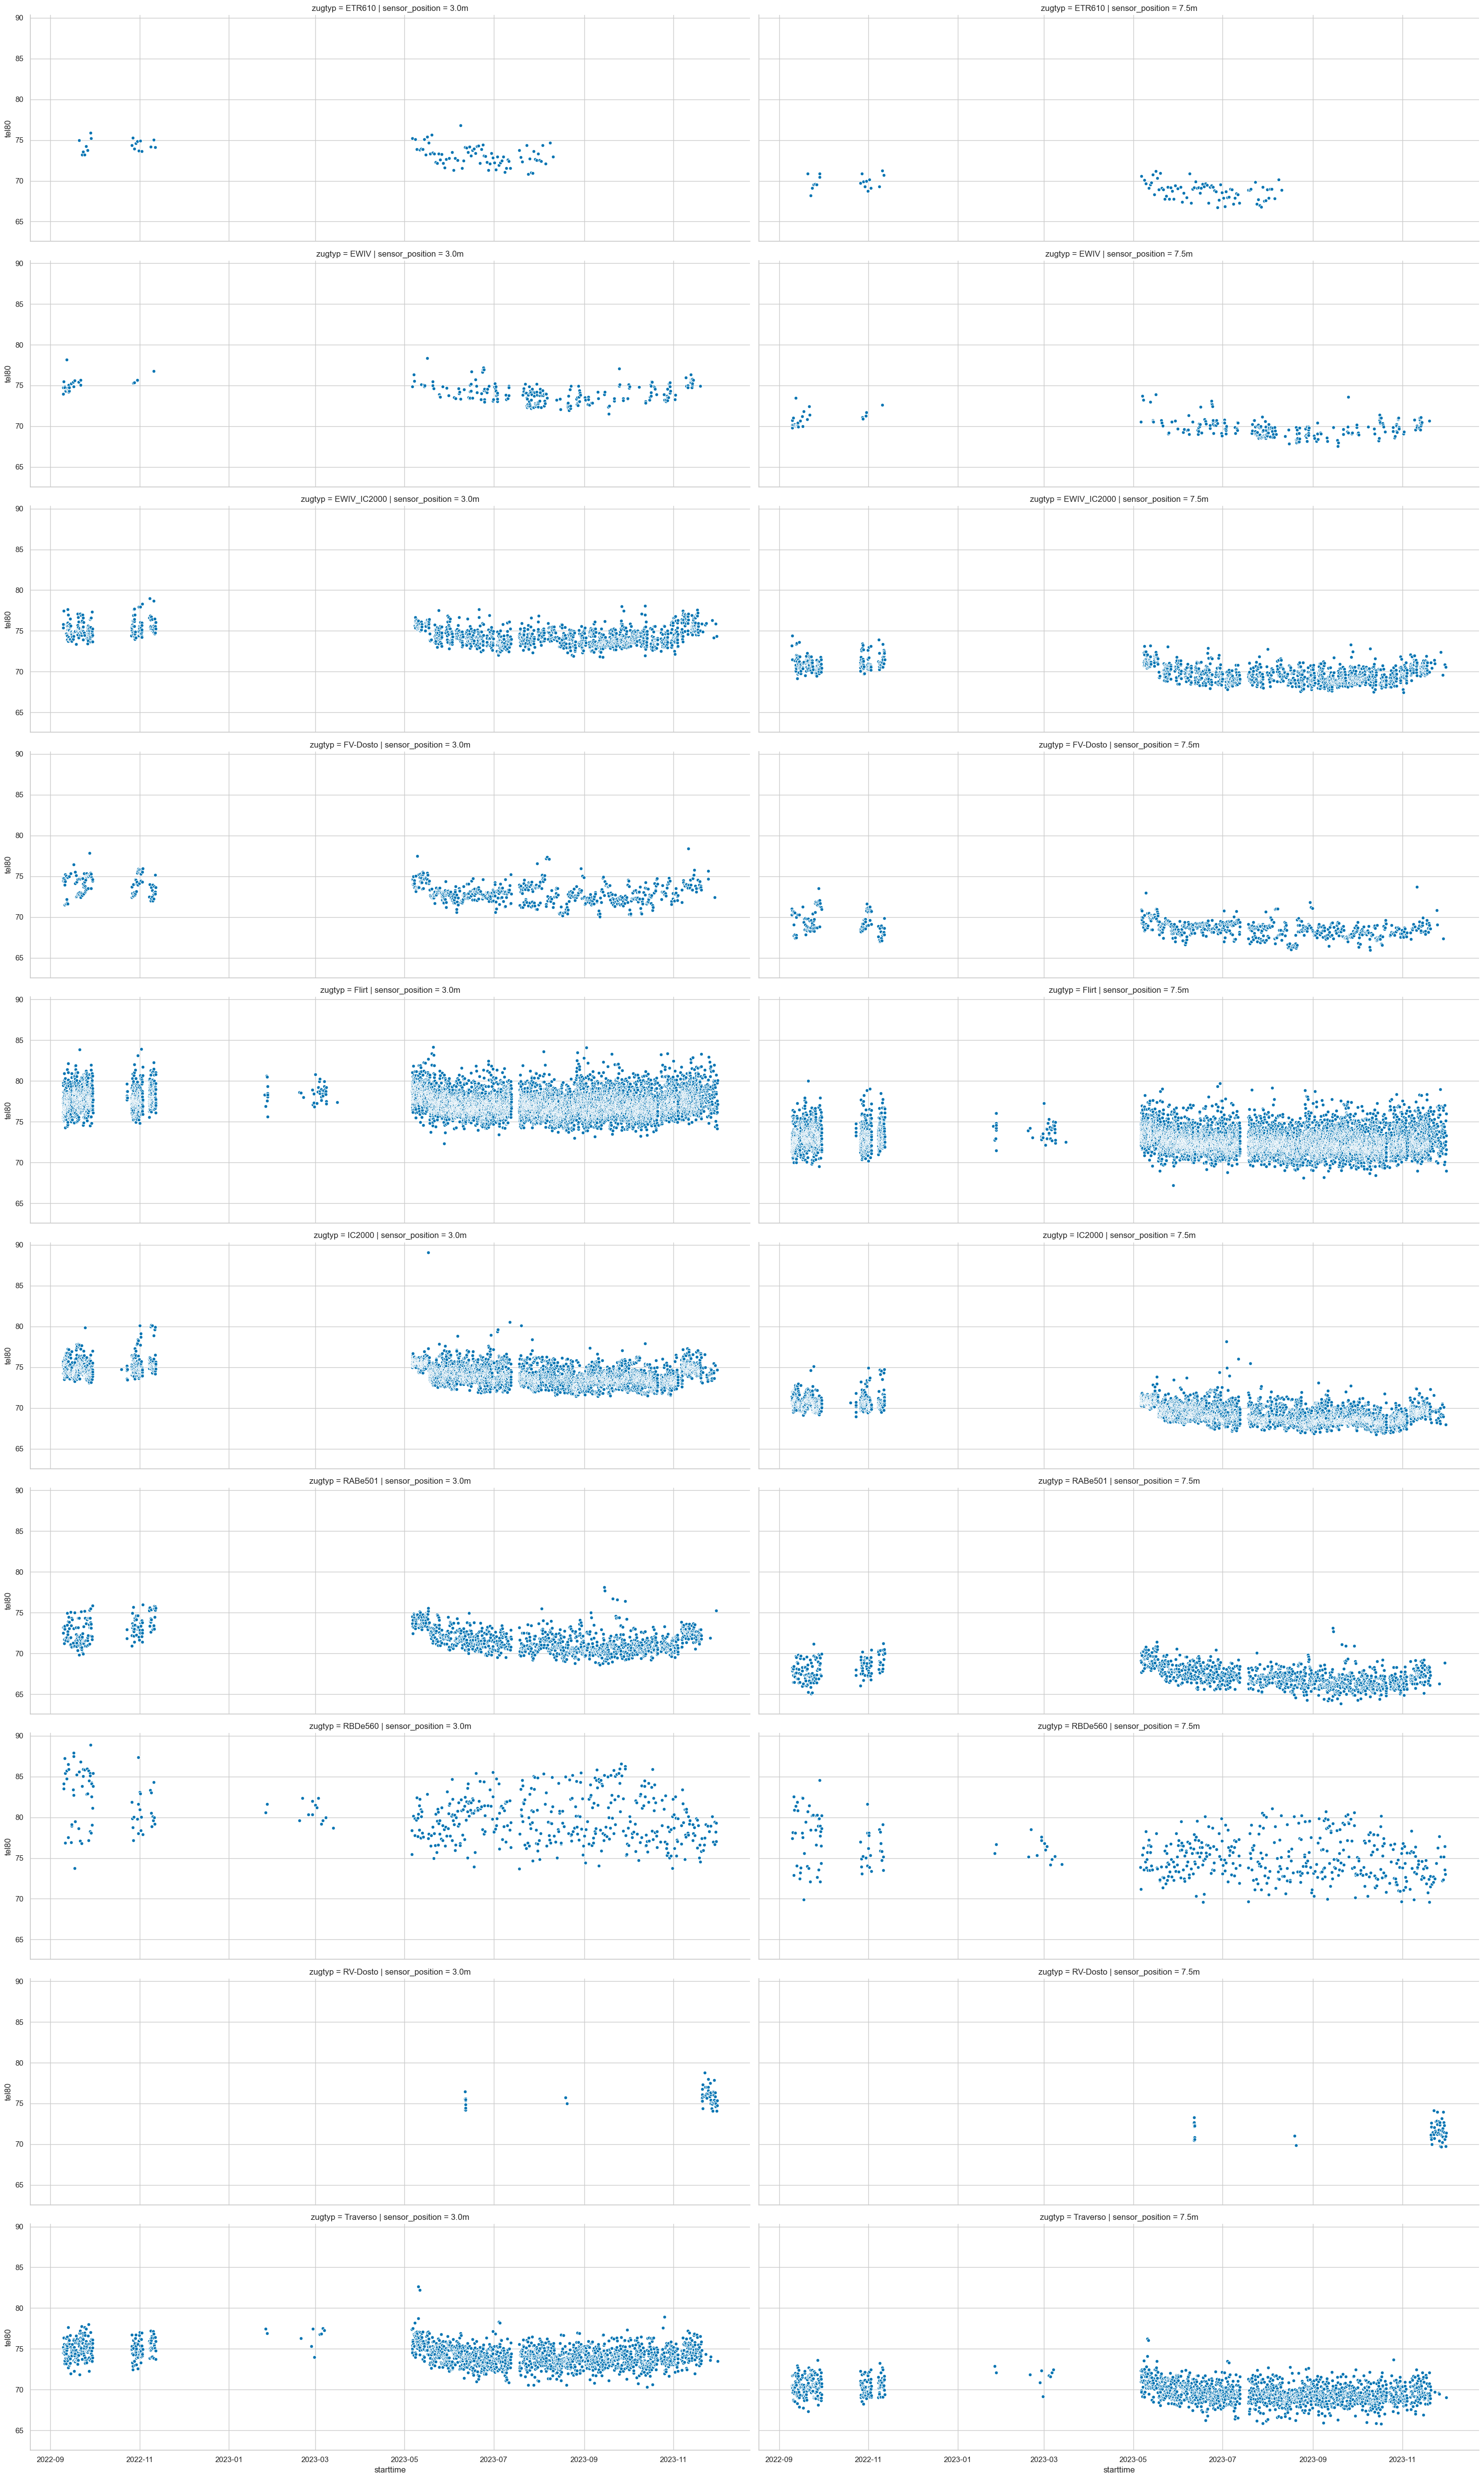

In [15]:
sns.set_theme(style="whitegrid", palette="colorblind")
fig = sns.relplot(
        data=dataMQ21.sort_values(["zugtyp", "sensor_position"]),
        x="starttime",
        y="tel80",
        row="zugtyp",
        col="sensor_position",
        kind="line",
        height=5, aspect=3,
        linestyle='',
        marker='o', linewidth=.2, markersize=5
)